https://acclab.github.io/DABEST-python-docs/tutorial.html

In [5]:
import numpy as np
import pandas as pd
import dabest

print("We're using DABEST v{}".format(dabest.__version__))

We're using DABEST v0.3.0


In [7]:
 from scipy.stats import norm # Used in generation of populations.

np.random.seed(9999) # Fix the seed so the results are replicable.
# pop_size = 10000 # Size of each population.
Ns = 20 # The number of samples taken from each population

# Create samples
c1 = norm.rvs(loc=3, scale=0.4, size=Ns)
c2 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
c3 = norm.rvs(loc=3.25, scale=0.4, size=Ns)

t1 = norm.rvs(loc=3.5, scale=0.5, size=Ns)
t2 = norm.rvs(loc=2.5, scale=0.6, size=Ns)
t3 = norm.rvs(loc=3, scale=0.75, size=Ns)
t4 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
t5 = norm.rvs(loc=3.25, scale=0.4, size=Ns)
t6 = norm.rvs(loc=3.25, scale=0.4, size=Ns)


# Add a `gender` column for coloring the data.
females = np.repeat('Female', Ns/2).tolist()
males = np.repeat('Male', Ns/2).tolist()
gender = females + males

# Add an `id` column for paired data plotting.
id_col = pd.Series(range(1, Ns+1))

# Combine samples and gender into a DataFrame.
df = pd.DataFrame({'Control 1' : c1,     'Test 1' : t1,
                    'Control 2' : c2,     'Test 2' : t2,
                    'Control 3' : c3,     'Test 3' : t3,
                    'Test 4'    : t4,     'Test 5' : t5, 'Test 6' : t6,
                    'Gender'    : gender, 'ID'  : id_col
                })

In [8]:
df.head

<bound method NDFrame.head of     Control 1    Test 1  Control 2    Test 2  Control 3    Test 3    Test 4  \
0    2.793984  3.420875   3.324661  1.707467   3.816940  1.796581  4.440050   
1    3.236759  3.467972   3.685186  1.121846   3.750358  3.944566  3.723494   
2    3.019149  4.377179   5.616891  3.301381   2.945397  2.832188  3.214014   
3    2.804638  4.564780   2.773152  2.534018   3.575179  3.048267  4.968278   
4    2.858019  3.220058   2.550361  2.796365   3.692138  3.276575  2.662104   
5    2.843275  3.092262   5.013249  2.928608   2.510410  3.498829  2.307823   
6    3.745704  3.324451   4.331604  1.389322   3.775645  2.712439  2.619072   
7    2.451404  3.065116   3.437110  2.117358   3.241186  2.946989  3.696196   
8    3.890510  3.486234   2.600899  1.612172   4.078796  2.575139  5.609698   
9    2.952756  3.278170   5.698779  2.393850   3.264995  1.933239  4.637866   
10   3.047939  2.646389   4.161885  2.350821   3.000116  2.289705  3.894876   
11   3.073040  4.08123

In [9]:
two_groups_unpaired = dabest.load(df, idx=("Control 1", "Test 1"), resamples=5000)

In [10]:
two_groups_unpaired

DABEST v0.3.0
             
Good afternoon!
The current time is Mon Sep 28 13:40:10 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. Test 1 minus Control 1

5000 resamples will be used to generate the effect size bootstraps.

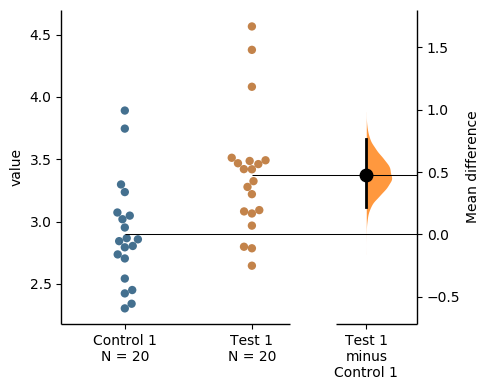

In [11]:
two_groups_unpaired.mean_diff.plot();
#In general the semicolon does nothing (C/java habit). But if you are using the jupyter notebook (depending on your version), you might get a figure plotted twice. The semicolon at the end of your plot command prevents this: df.plt();